<a href="https://colab.research.google.com/github/Facco-Bruno/Alura-ML/blob/Master/Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Wine Analysis using Kmeans

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
caminho_arquivo = "Wine.csv"
df = pd.read_csv(caminho_arquivo) 

In [3]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
print("O dado possui",df.shape[0], "amostras e", df.shape[1], "atributos")

O dado possui 178 amostras e 14 atributos


In [5]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcalinity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

In [6]:
df.head(3)

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


In [7]:
df.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
matriz_corr = df.corr()

In [9]:
matriz_corr

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Fenois,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Fenois_nao_flavalonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

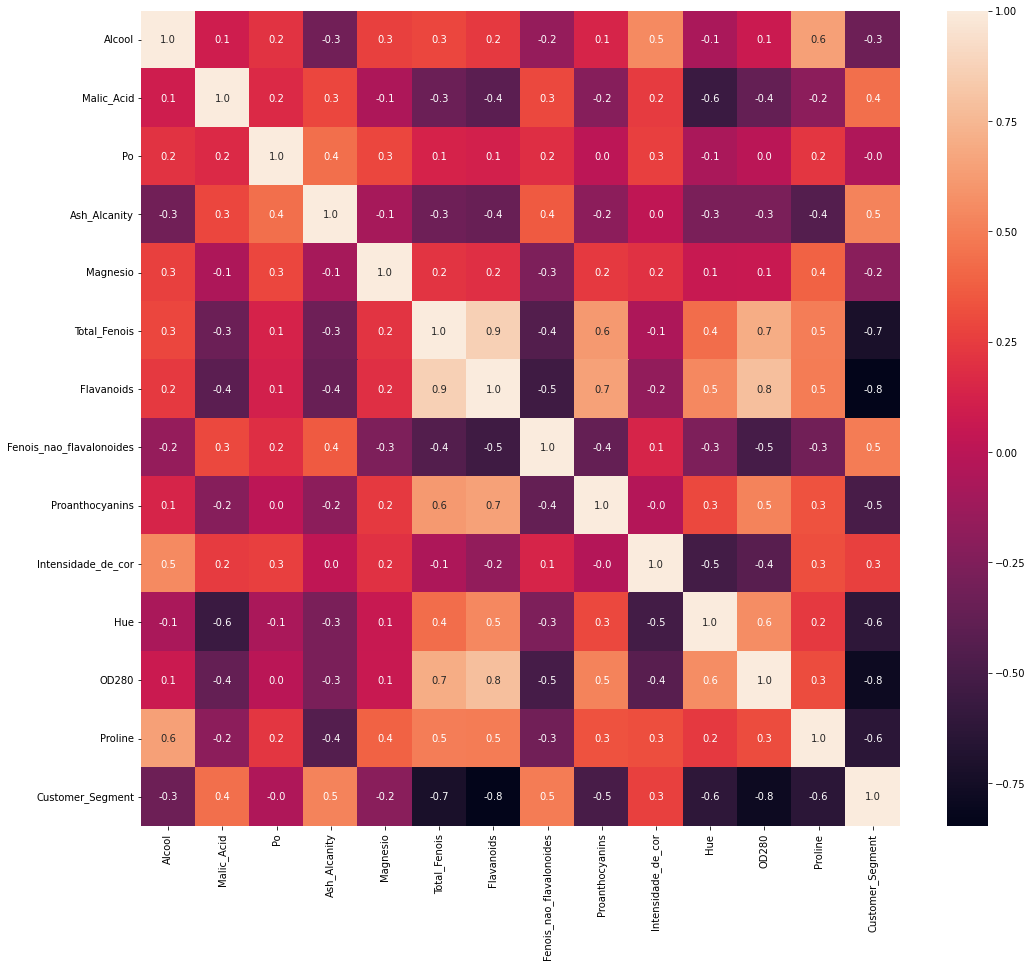

In [11]:
plt.figure(figsize = (17, 15))

sns.heatmap(matriz_corr, annot = True, fmt = ".1f")

In [12]:
colunas = df.columns

In [13]:
#for atributo in atributos:
#  df[atributo] = (df[atributo]-min(df[atributo]))/(max(df[atributo])-min(df[atributo]))

In [14]:
df.head(3)

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


In [15]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
np_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = colunas)
df.describe()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18,-9.056426e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,-1.213944e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,-1.213944e+00
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,7.996036e-02
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,1.373864e+00
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,1.373864e+00


In [16]:
from sklearn.cluster import KMeans

In [17]:
agrupador = KMeans(n_clusters=4)

In [18]:
agrupador.fit(df)

KMeans(n_clusters=4)

In [19]:
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 2 2 3 2 2 2 2 3 2 3
 3 2 2 2 2 3 2 2 2 1 3 2 2 2 2 2 2 2 2 3 3 0 2 2 3 3 2 2 3 2 2 2 2 2 2 3 3
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
agrupador.fit(df)
labels - agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 3 2 2 3 2 2 2 2 3 2 3
 3 2 2 2 2 3 2 2 2 1 3 2 2 2 2 2 2 2 2 3 3 0 2 2 3 3 2 2 3 2 2 2 2 2 2 3 3
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
import plotly.graph_objs as go

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'], y = df['Alcool'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupador.labels_.astype(np.float)),
                                                        text = labels))
fig.show()

In [24]:
agrupador = KMeans(n_clusters=3)
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'],
                         y = df['Alcool'], mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = labels))

fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                         y = df['Alcool'], z = df['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

In [27]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

In [28]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = colunas
centros.head()

,Alcool,Malic_Acid,Po,Ash_Alcanity,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.878097,-0.304576,0.318942,-0.664524,0.564888,0.876505,0.943639,-0.585590,0.581783,0.167188,0.483728,0.767053,1.158347,-1.171521
1,-0.922126,-0.378889,-0.465688,0.175507,-0.470251,-0.073934,0.044288,0.008761,0.018265,-0.862278,0.424503,0.249782,-0.765250,0.079960
2,0.186543,0.904971,0.249210,0.583703,-0.050635,-0.988557,-1.236195,0.716842,-0.749608,0.988498,-1.191299,-1.301540,-0.380045,1.347458


In [30]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                         y = centros['Alcool'], z=centros['Proline'],
                         mode = 'markers',                  
                        marker = dict(color = 'red'),
                        text = [0, 1, 2]))
fig.show()

In [33]:
nova_amostra = [2,0,1.5,27,4,14,38,0.7,10, 1, 4, 16,12, 3]
label_nova_amostra = agrupador.predict([nova_amostra])
print(label_nova_amostra)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [67]:
agrupador = DBSCAN(eps = 6, min_samples = 5, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  2,  2,  2,  2,  2,  2,
       -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2,  2,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [68]:
from sklearn.cluster import MeanShift

In [69]:
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [70]:
from sklearn.cluster import estimate_bandwidth

In [71]:
BW = estimate_bandwidth(df, quantile = 0.1)
print(BW)

3.022204811808734


In [72]:
BW = estimate_bandwidth(df, quantile = 0.8)
print(BW)

6.324517585113402


In [74]:
BW = estimate_bandwidth(df, quantile = 0.2)
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [76]:
faixa_n_clusters = [i for i in range(2,10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [77]:
from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k)
    labels = agrupador.fit_predict(df)
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)

In [79]:
fig =go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médios",
    xaxis_title = "Número de Clústeres",
    yaxis_title = "Valor médio de silhueta",
    )


In [90]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [94]:
agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_DBSCAN = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(df, quantile = 0.28)
agrupador_meanshift = MeanShift(bandwidth = BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_DBSCAN.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Labels DBSCAN:  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 